In [1]:
import networkx as nx
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1. Create Network

In [2]:
G = nx.DiGraph() #create an empty directed graph 

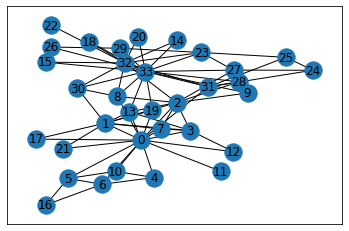

In [3]:
# add edges to the graph 
edge_list = pd.read_csv("edges.csv")
G = nx.from_pandas_edgelist(edge_list,'# source',' target',create_using=nx.Graph())
nx.draw_networkx(G)

In [4]:
# check if directed
G.is_directed()

False

## 2. Add node attributes

In [5]:
# reading CSV file "nodelist.csv"
node_list = pd.read_csv("nodelist.csv")

# add the club information to nodes, name the attribute as "club"
node_list['club']=node_list['club'].astype('category')
nx.set_node_attributes(G,node_list['club'],'club')

In [6]:
# check data
G.nodes(data=True)

NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 19: {'club': 'Mr. Hi'}, 21: {'club': 'Mr. Hi'}, 31: {'club': 'Officer'}, 30: {'club': 'Officer'}, 9: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 32: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 33: {'club': 'Officer'}, 23: {'club': 'Officer'}, 25: {'club': 'Officer'}, 29: {'club': 'Officer'}, 24: {'club': 'Officer'}, 26: {'club': 'Officer'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 18: {'club': 'Officer'}, 20: {'club': 'Officer'}, 22: {'club': 'Officer'}})

In [7]:
# add a wrong "clubs" attribute to the nodes
nx.set_node_attributes(G, node_list['club'], 'clubs')
G.nodes(data=True)

NodeDataView({0: {'club': 'Mr. Hi', 'clubs': 'Mr. Hi'}, 1: {'club': 'Mr. Hi', 'clubs': 'Mr. Hi'}, 2: {'club': 'Mr. Hi', 'clubs': 'Mr. Hi'}, 3: {'club': 'Mr. Hi', 'clubs': 'Mr. Hi'}, 4: {'club': 'Mr. Hi', 'clubs': 'Mr. Hi'}, 5: {'club': 'Mr. Hi', 'clubs': 'Mr. Hi'}, 6: {'club': 'Mr. Hi', 'clubs': 'Mr. Hi'}, 7: {'club': 'Mr. Hi', 'clubs': 'Mr. Hi'}, 8: {'club': 'Mr. Hi', 'clubs': 'Mr. Hi'}, 10: {'club': 'Mr. Hi', 'clubs': 'Mr. Hi'}, 11: {'club': 'Mr. Hi', 'clubs': 'Mr. Hi'}, 12: {'club': 'Mr. Hi', 'clubs': 'Mr. Hi'}, 13: {'club': 'Mr. Hi', 'clubs': 'Mr. Hi'}, 17: {'club': 'Mr. Hi', 'clubs': 'Mr. Hi'}, 19: {'club': 'Mr. Hi', 'clubs': 'Mr. Hi'}, 21: {'club': 'Mr. Hi', 'clubs': 'Mr. Hi'}, 31: {'club': 'Officer', 'clubs': 'Officer'}, 30: {'club': 'Officer', 'clubs': 'Officer'}, 9: {'club': 'Officer', 'clubs': 'Officer'}, 27: {'club': 'Officer', 'clubs': 'Officer'}, 28: {'club': 'Officer', 'clubs': 'Officer'}, 32: {'club': 'Officer', 'clubs': 'Officer'}, 16: {'club': 'Mr. Hi', 'clubs': 'Mr. H

In [8]:
# delete the wrong attribute "clubs"
for i in range(0,34):
 del G.nodes[i]['clubs']

In [9]:
G.nodes(data=True)

NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 19: {'club': 'Mr. Hi'}, 21: {'club': 'Mr. Hi'}, 31: {'club': 'Officer'}, 30: {'club': 'Officer'}, 9: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 32: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 33: {'club': 'Officer'}, 23: {'club': 'Officer'}, 25: {'club': 'Officer'}, 29: {'club': 'Officer'}, 24: {'club': 'Officer'}, 26: {'club': 'Officer'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 18: {'club': 'Officer'}, 20: {'club': 'Officer'}, 22: {'club': 'Officer'}})

## 3. Network visualization

In [10]:
# calculate node degree centrality and store in a dictionary
degree_centrality = nx.degree_centrality(G) 
# add degree centrality attribute to nodes
nx.set_node_attributes(G, degree_centrality, 'degree_centrality')
#G.nodes(data=True)

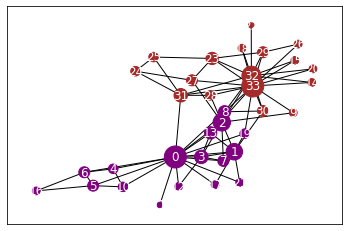

In [11]:
# change node color based on "club" attribute
# change node size based on node degree centrality
pos = nx.spring_layout(G)
nx.draw_networkx(G, node_color = ['brown' if j[1]['club']=='Officer' else 'purple' for j in G.nodes(data=True)],\
                 node_size = [1000*i[1]['degree_centrality'] for i in G.nodes(data=True)],\
                 font_color = 'white', pos=pos)
#  j[1]["attributes"], remember j[1]

Text(0.5, 1.0, 'Circular')

(-1.2099999980628493,
 1.209999999815927,
 -1.2048383873716348,
 1.2048383381687398)

Text(0.5, 1.0, 'spring layout')

(-0.46278556453857056,
 0.6243717871077655,
 -1.0779648999825726,
 1.1974536782788872)

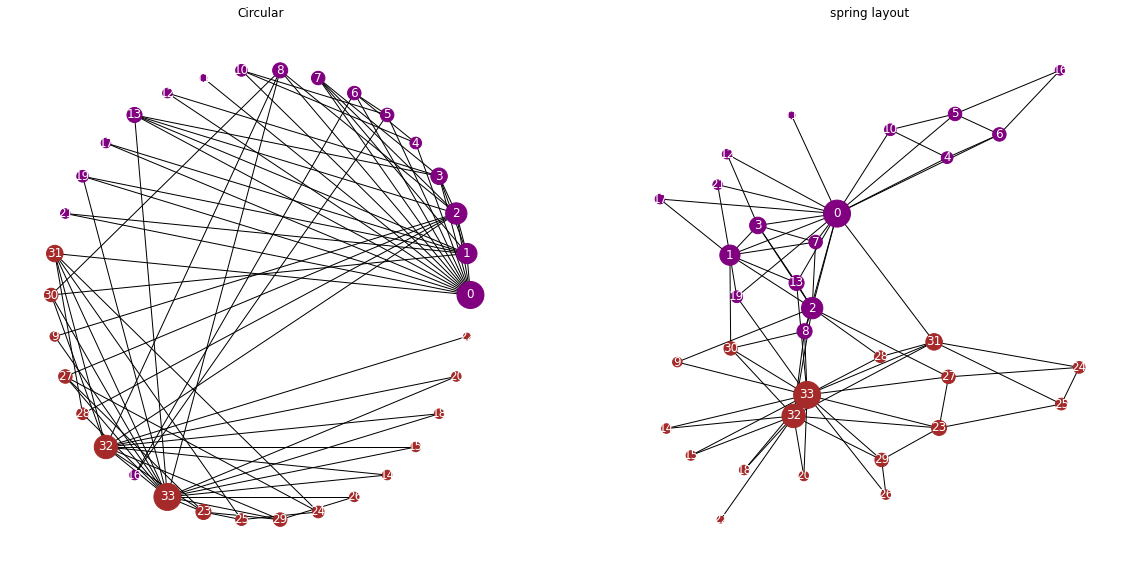

In [12]:
# play with different layouts
import matplotlib.pyplot as plt 
fig, plot = plt.subplots(1,2,figsize=(20,10))
colors = ['brown' if j[1]['club']=='Officer' else 'purple' for j in G.nodes(data=True)]
layouts = (nx.circular_layout, nx.spring_layout)
titles = ('Circular', 'spring layout')
for plots, layout, title in zip(plot,layouts, titles):
    pos = layout(G)
    nx.draw_networkx(G, node_color = colors, pos = pos, \
                     node_size = [1500*i[1]['degree_centrality'] for i in G.nodes(data=True)], \
                     with_labels = True, font_color = 'white', ax = plots)
    plots.set_title(title)
    plots.axis('off')

Text(0.5, 1.0, 'spiral layout')

(-1.008623162595408,
 0.851190872380965,
 -1.1933315028073768,
 1.0345839104966807)

Text(0.5, 1.0, 'shell layout')

(-1.2100000000000002,
 1.2100000000000002,
 -1.204838399887085,
 1.204838399887085)

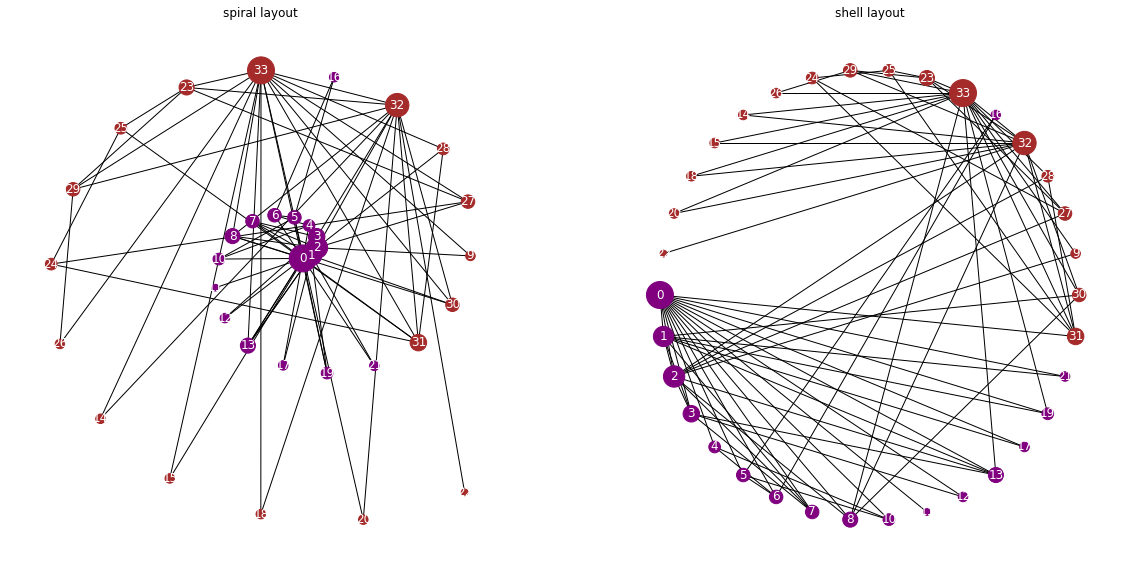

In [13]:

fig, plot = plt.subplots(1,2,figsize=(20,10))
colors = ['brown' if j[1]['club']=='Officer' else 'purple' for j in G.nodes(data=True)]
layouts = (nx.spiral_layout, nx.shell_layout)
titles = ('spiral layout', 'shell layout')
for plots, layout, title in zip(plot,layouts, titles):
    pos = layout(G)
    nx.draw_networkx(G, node_color = colors, pos = pos, \
                     node_size = [1500*i[1]['degree_centrality'] for i in G.nodes(data=True)], \
                     with_labels = True, font_color = 'white', ax = plots)
    plots.set_title(title)
    plots.axis('off')


Group by Club and degree centrality

Text(0.5, 1.0, 'shell layout by club')

(-1.2082121753692625,
 1.1911852741241453,
 -1.2048383936285973,
 1.2048383340239526)

Text(0.5, 1.0, 'shell layout by degree centrality')

(-1.2100000000000002,
 1.2100000000000002,
 -1.2100000000000002,
 1.2100000000000002)

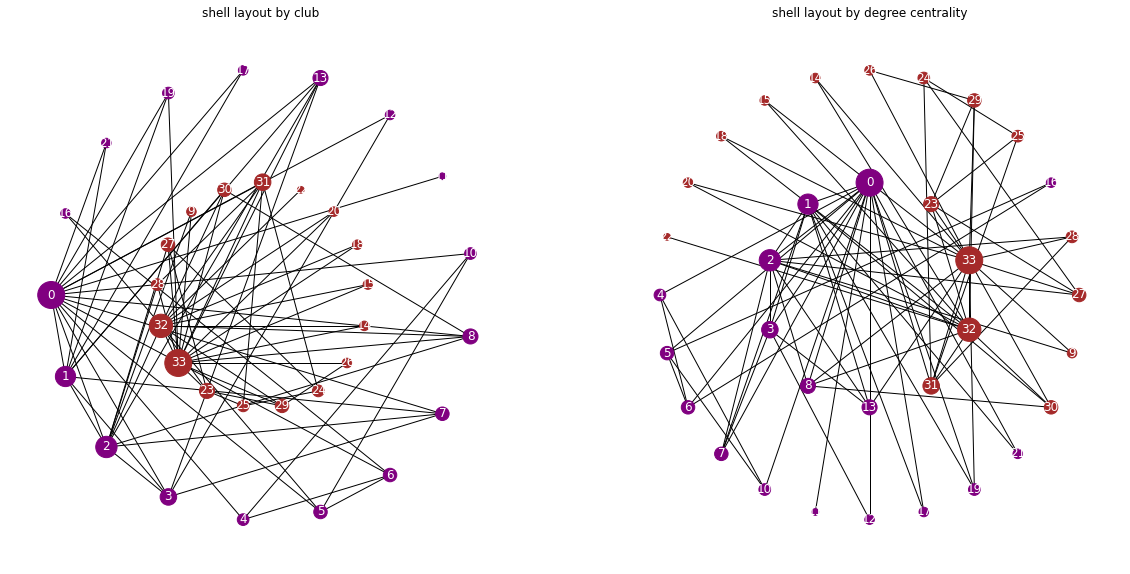

In [14]:
fig, plot = plt.subplots(1,2,figsize=(20,10))
colors = ['brown' if j[1]['club']=='Officer' else 'purple' for j in G.nodes(data=True)]
shell_groupings = ([[i[0] for i in G.nodes(data = True) if i[1]['club']=='Officer'],\
                   [i[0] for i in G.nodes(data = True) if i[1]['club']=='Mr. Hi']],\
                  [[i[0] for i in G.nodes(data = True) if i[1]['degree_centrality']>0.15],\
                   [i[0] for i in G.nodes(data = True) if i[1]['degree_centrality']<=0.15]])
layouts = (nx.shell_layout, nx.shell_layout)
titles = ('shell layout by club', 'shell layout by degree centrality')
for plots, shell_grouping, layout, title in zip(plot,shell_groupings, layouts, titles):
    pos = layout(G, shell_grouping)
    nx.draw_networkx(G, node_color = colors, pos = pos, \
                     node_size = [1500*i[1]['degree_centrality'] for i in G.nodes(data=True)], \
                     with_labels = True, font_color = 'white', ax = plots)
    plots.set_title(title)
    plots.axis('off')

## 4. Compute and interpret measurements

### （1）Network density, diameter, average shortest path

In [15]:
nx.density(G) 

0.13725490196078433

Network density is 0.1373, meaning the observed edges only count for 13.73% of all possible edges, it is not a highly connected network.

In [16]:
nx.diameter(G) 

5

The diameter of network is 5, meaning the path between the two most distant nodes is 5. 

In [17]:
nx.average_shortest_path_length(G) 

2.4206773618538326

Average shortest path in this graph is 2.42, suggesting that it took each node on average 2.42 steps to reach every node. Hence, even though some pair of nodes are far away, the network is relatively compact as a whole.

### 2. Degree, betweenness, closeness, eigenvector centralities , pagerank centrality

In [18]:
degree_c = nx.degree_centrality(G)
degree_c

print("Node with the highest degree centrality:",max(degree_c, key=degree_c.get))
print("Node with the lowest degree centrality:",min(degree_c, key=degree_c.get))

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 17: 0.06060606060606061,
 19: 0.09090909090909091,
 21: 0.06060606060606061,
 31: 0.18181818181818182,
 30: 0.12121212121212122,
 9: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 32: 0.36363636363636365,
 16: 0.06060606060606061,
 33: 0.48484848484848486,
 23: 0.15151515151515152,
 25: 0.09090909090909091,
 29: 0.12121212121212122,
 24: 0.09090909090909091,
 26: 0.06060606060606061,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 18: 0.06060606060606061,
 20: 0.06060606060606061,
 22: 0.030303030303030304}

Node with the highest degree centrality: 0
Node with the lowest degree centrality: 11


Node 0 has the highest degree centrality, meaning it connects to the most nodes; node 11 and 22 has the lowest degree centrality, connecting to only one node.

In [19]:
between_c = nx.betweenness_centrality(G)
between_c

print("Node with the highest betweenness centrality:",max(between_c, key=between_c.get))
print("Node with the lowest betweenness centrality:",min(between_c, key=between_c.get))

{0: 0.43764580327080344,
 1: 0.053873556998557,
 2: 0.1522637085137085,
 3: 0.01196188071188071,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.056737012987012996,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04159151034151034,
 17: 0.0,
 19: 0.02936056998556999,
 21: 0.0,
 31: 0.14034842472342476,
 30: 0.014727633477633473,
 9: 0.0008477633477633478,
 27: 0.02170214045214045,
 28: 0.0017947330447330447,
 32: 0.18215788840788844,
 16: 0.0,
 33: 0.27505561568061565,
 23: 0.018244949494949494,
 25: 0.0038404882154882162,
 29: 0.0038690476190476187,
 24: 0.0022095959595959595,
 26: 0.0,
 14: 0.0,
 15: 0.0,
 18: 0.0,
 20: 0.0,
 22: 0.0}

Node with the highest betweenness centrality: 0
Node with the lowest betweenness centrality: 7


Betweenness measures the importance of nodes in connecting other nodes. 
Node 0 has the highst betweenness centrality, which means it most frequently appears in the path connecting two pairs of nodes. It serves as the mediator to connect nonadjacent actors. Node 7 has the lowest betweenness centrality, and is less appeared in paths connecting all pairs in the graph.

In [20]:
close_c = nx.closeness_centrality(G)
close_c

print("Node with the highest closeness centrality:",max(close_c, key=close_c.get))
print("Node with the lowest closeness centrality:",min(close_c, key=close_c.get))

{0: 0.5689655172413793,
 1: 0.4852941176470588,
 2: 0.559322033898305,
 3: 0.4647887323943662,
 4: 0.3793103448275862,
 5: 0.38372093023255816,
 6: 0.38372093023255816,
 7: 0.44,
 8: 0.515625,
 10: 0.3793103448275862,
 11: 0.36666666666666664,
 12: 0.3707865168539326,
 13: 0.5076923076923077,
 17: 0.375,
 19: 0.4925373134328358,
 21: 0.375,
 31: 0.5409836065573771,
 30: 0.4583333333333333,
 9: 0.42857142857142855,
 27: 0.4520547945205479,
 28: 0.44594594594594594,
 32: 0.515625,
 16: 0.28448275862068967,
 33: 0.5409836065573771,
 23: 0.39285714285714285,
 25: 0.375,
 29: 0.38372093023255816,
 24: 0.375,
 26: 0.358695652173913,
 14: 0.3707865168539326,
 15: 0.3707865168539326,
 18: 0.3707865168539326,
 20: 0.3707865168539326,
 22: 0.34375}

Node with the highest closeness centrality: 0
Node with the lowest closeness centrality: 16


Closeness centrality outputs the inverse of average shortest path length of a node to all other nodes in a network.
Node 0 has the highest closeness centrality, meaning it is more proximate to other nodes than all the other nodes, and node 16 has the lowest closeness centrality, meaning it is the most distant node to other nodes in the network.

In [21]:
Eigen_c = nx.eigenvector_centrality(G)
Eigen_c

print("Node with the highest eigenvector centrality:",max(Eigen_c, key=Eigen_c.get))
print("Node with the lowest eigenvector centrality:",min(Eigen_c, key=Eigen_c.get))

{0: 0.36872596095610966,
 1: 0.275608544855244,
 2: 0.3243678114012024,
 3: 0.2197759450627841,
 4: 0.07971043643022753,
 5: 0.08345909577948038,
 6: 0.0834590957794804,
 7: 0.1781071732757733,
 8: 0.22789782008485054,
 10: 0.07971043643022754,
 11: 0.05525776188021192,
 12: 0.08819365157574227,
 13: 0.23152343277913826,
 17: 0.09656084845612938,
 19: 0.14997710795949434,
 21: 0.09656084845612938,
 31: 0.19027268463495864,
 30: 0.17348683115148705,
 9: 0.10202669462747854,
 27: 0.13253597799860406,
 28: 0.13054156118688934,
 32: 0.29769755751183175,
 16: 0.02501444421522389,
 33: 0.35643233109637346,
 23: 0.14635687790131963,
 25: 0.05902414993053635,
 29: 0.13090933019085865,
 24: 0.057222765668453454,
 26: 0.07303490273351672,
 14: 0.09803033556212525,
 15: 0.09803033556212525,
 18: 0.09803033556212525,
 20: 0.09803033556212525,
 22: 0.04461407605876028}

Node with the highest eigenvector centrality: 0
Node with the lowest eigenvector centrality: 16


Node 0 has the highest eigenvector centrality, meaning it is the most influential/prestigious node in the network, while node 16 has the lowest eigenvector centrality, being less influential in the network.

In [22]:
#nx.pagerank(G)
#task deleted as said in the lecture